# Moving Average Indicator

Extremely easy approach, (not miss-confuse with the moving average time series related model which is a bit more complicated).

Indicator:
- First used back in 1901,
- One of the most popular technical indicator,
- Arithmetic mean of a given asset price over specific number of days in the past,
- Calculate the moving avg of a stock helps to smooth out the price data.



$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$


### Long time periods (slow SMA)
- popular times are 50, 100 and 200,
- Less sensitive as price changes,
- used for long term positions.


### Short time periods (fast sma)
- popular times are 15, 20 and 30,
- more sensitive to price changes so no that smooth,
- used mostly for short term positions.

#### Example
- green series: short time sma
- blue series: long time sma

![alt text](assets/sma1.png)

In [10]:
# libraries 

import yfinance as yf 
import pandas as pd


In [11]:
def download_data(stock: str, start_date: str, end_date: str) -> pd.DataFrame:
    # Download data using yfinance
    ticker = yf.download(stock, start=start_date, end=end_date)
    
    # Print the keys of the downloaded data (for debugging)
    #rint(ticker.keys())
    
    # Create a dictionary with the required data
    data = {
        'Price': [item[0] for item in ticker['Close'].values],  # Use the 'Close' column for prices
        'Timestamp': ticker.index  # Use the index (dates) as the timestamp
    }
    # Convert the dictionary to a DataFrame
    res_df = pd.DataFrame(data)
    
    # Set the 'Timestamp' column as the index
    res_df.set_index('Timestamp', inplace=True)
    
    return res_df

# Testing the function
start = '2010-01-05'
end = '2025-01-26'

stock_data = download_data('NVDA', start, end)
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                 Price
Timestamp             
2010-01-05    0.430113
2010-01-06    0.432864
2010-01-07    0.424381
2010-01-08    0.425298
2010-01-11    0.419337
...                ...
2025-01-17  137.710007
2025-01-21  140.830002
2025-01-22  147.070007
2025-01-23  147.220001
2025-01-24  142.619995

[3788 rows x 1 columns]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')

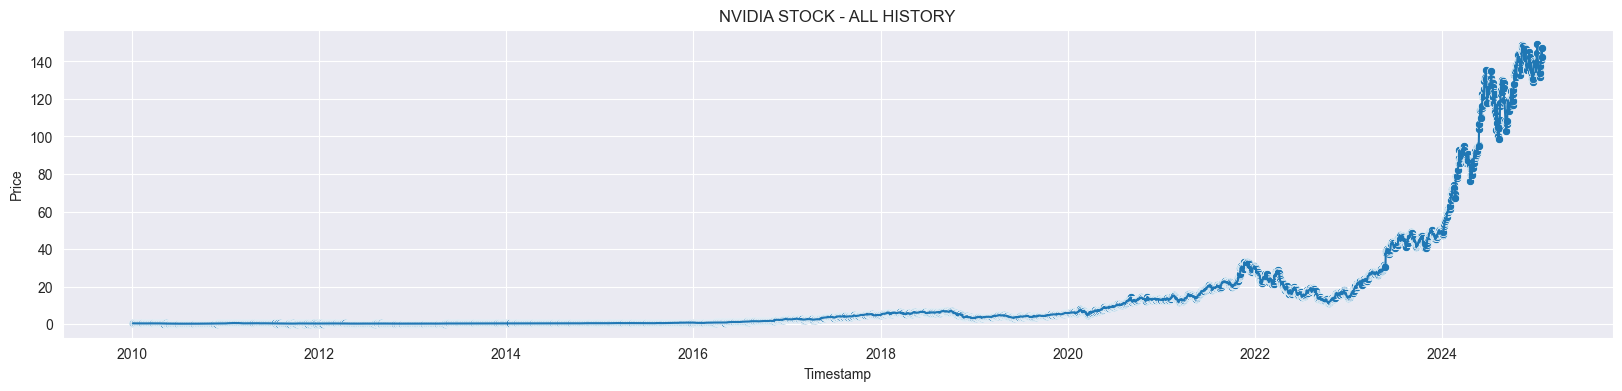

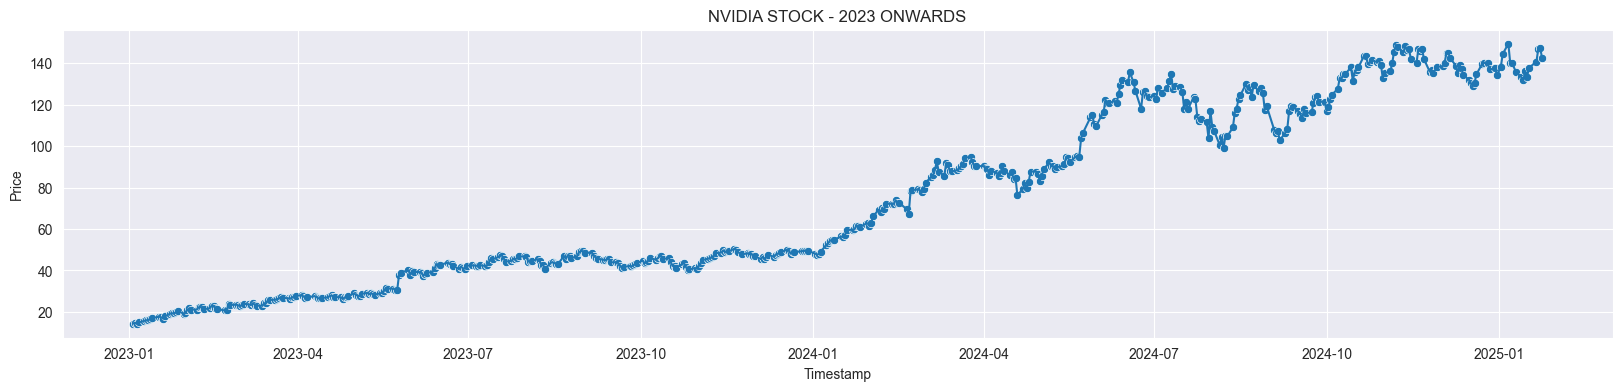

In [13]:
plt.figure(figsize=(20,4))
sns.lineplot(data=stock_data, x='Timestamp', y='Price')
sns.scatterplot(data=stock_data, x='Timestamp', y='Price')
plt.title('NVIDIA STOCK - ALL HISTORY')
plt.show()

plt.figure(figsize=(20,4))
sns.lineplot(data=stock_data['2023-01-01':], x='Timestamp', y='Price')
sns.scatterplot(data=stock_data['2023-01-01':], x='Timestamp', y='Price')
plt.title('NVIDIA STOCK - 2023 ONWARDS')
plt.show()

## SMA and Resistance Levels (algorithmic trading)

most common application of SMA (single moving avg):
- determine trend direction,
- when the S(t) price crosses their moving averages - these are usually trading signals.


#### Support level

* <b>During a bullish market, the SMAs can define the support levels. Are price levels that an asset does not fall bellow for some period of time.</b>
* we can detect these resistance levels with short as well as with fast period moving averages.

![alt text](assets/sma2.png)


#### Resistance level

* <b>During a bearish market, the SMAs can define the support levels. Are price levels that an asset does not go beyond for some period of time.</b>
* we can detect these resistance levels with short as well as with fast period moving averages.

![alt text](assets/sma3.png)


C:\Users\pops\AppData\Local\Temp\ipykernel_28032\3703184273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short SMA'] = data['Price'].rolling(window=short_period).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_28032\3703184273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long SMA'] = data['Price'].rolling(window=long_period).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_28032\3703184273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

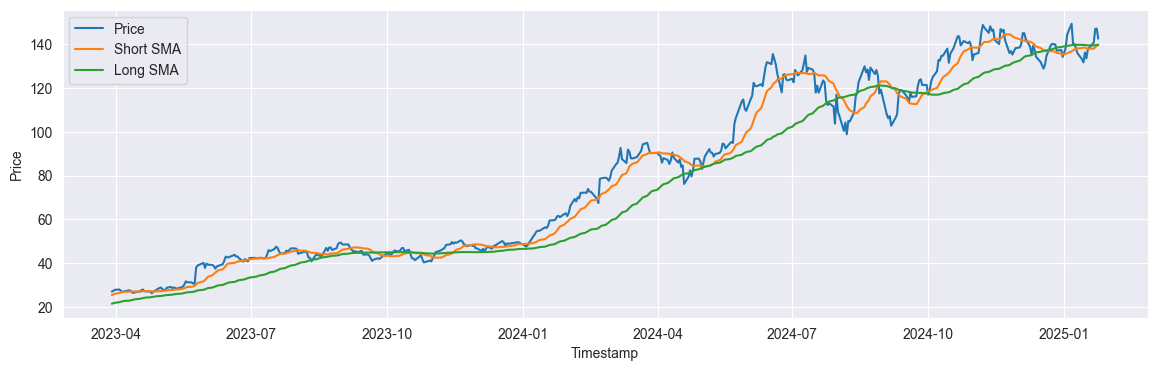

In [14]:
def construct_sma(data:pd.DataFrame, short_period:str, long_period:str, since_date:str):
    data.dropna(inplace=True)
    if since_date:
        data = data[since_date:]
    data['Short SMA'] = data['Price'].rolling(window=short_period).mean()
    data['Long SMA'] = data['Price'].rolling(window=long_period).mean()

    data.dropna(inplace=True)
    return data

def plot_data(data:pd.DataFrame):
    plt.figure(figsize=(14,4))
    for col in data.columns:
        sns.lineplot(data=data, x='Timestamp', y=col, label=col)
    plt.show()
    return 

# testing the function
data_ = construct_sma(stock_data, 15, 60, since_date='2023-01-01').copy()
plot_data(data_)

### Exponential Moving Average (EMA) Indicator

- it is similar to simple moving average indicator but here we introduce weighthing factos that decrease exponentially

Simple SMA is the unweighted mean of the previous S(t) stock prices. Using EMA we're dealing with exponentially weighted stock prices
- So, recent stock prices are more important in this model


$$
EMA_t = \alpha \cdot Price_t + (1 - \alpha) \cdot EMA_{t-1}
$$


The exponential moving avg is the weighted mean of the previous S(t) stock prices. The 'a' symbol represents the degree of decrease

C:\Users\pops\AppData\Local\Temp\ipykernel_28032\832198791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short EMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_28032\832198791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long EMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_28032\832198791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

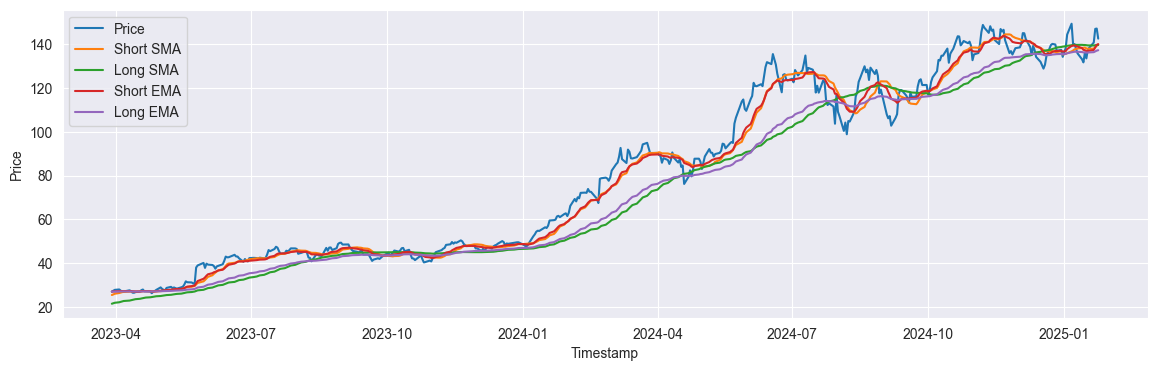

In [15]:
def construct_ema(data:pd.DataFrame, short_period:str, long_period:str, since_date:str):
    data.dropna(inplace=True)
    if since_date:
        data = data[since_date:]
    data['Short EMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
    data['Long EMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
    
    data.dropna(inplace=True)
    return data

data_ = construct_ema(data_, 15, 60, since_date='2023-01-01')

plot_data(data_)


### Moving Average Crossover Strategy: I



<h3> Long position strategy: Signals of bullish market </h3>

- When short SMA crosses upward the long SMA, it is a symbol that a potential bullish market is going to happen. This is called <b> the golden cross. </b>

![alt text](assets/sma_strat1.png)


- Once the smoothed signals crossed the other way around again, it is a signal of a bearish market. This is called <b> the death cross. </b>

![alt text](assets/sma_strat2.png)

In [87]:
# Strategy implementation

import yfinance as yf 
import pandas as pd


class MovingAverageCrossover:

    def __init__(self, capital, stock, start, end, short_period, long_period):
        self.data = None
        self.is_long = False
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital] # pss, Equity is shares/stocks of a company, also is used for companies worth measurement (Equity = Assets - Liabilities)

        self.stock = stock 
        self.start = start
        self.end = end
        self.trading_dates = []



    def download_data(self) -> pd.DataFrame:
        # Download data using yfinance
        ticker = yf.download(self.stock, self.start, self.end)
        
        # Create a dictionary with the required data
        data = {
            'Price': [item[0] for item in ticker['Close'].values],  # Use the 'Close' column for prices
            'Timestamp': ticker.index  # Use the index (dates) as the timestamp
        }
        # Convert the dictionary to a DataFrame
        res_df = pd.DataFrame(data)
        
        # Set the 'Timestamp' column as the index
        res_df.set_index('Timestamp', inplace=True)

        self.data = res_df
        
        return
    

    def construct_signals(self):
        self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
        self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
        return 
    
    def plot_signals(self, plot_trading_dates=False):
        sns.set_style('darkgrid')
        sns.set_palette('tab10')
        plt.figure(figsize=(16,4))
        sns.lineplot(data=self.data, x='Timestamp', y='Price', label='stock price')
        sns.lineplot(data=self.data, x='Timestamp', y='short_ma', label=f'short_ma: {self.short_period}')
        sns.lineplot(data=self.data, x='Timestamp', y='long_ma', label=f'long_ma: {self.long_period}')

        if plot_trading_dates:
            y_min, y_max = plt.ylim()
            text_y_position = y_max + (y_max - y_min) * -0.1  # Place text slightly above the plot


            # Process trades by type
            buy_dates = [trade['date'] for trade in self.trading_dates if trade['type'] == 'BUY']
            sell_dates = [trade['date'] for trade in self.trading_dates if trade['type'] == 'SELL']
            # Plot buy signals
            for date in buy_dates:
                plt.axvline(x=date, color='green', alpha=0.5, linestyle='--', 
                            label='Buy' if date == buy_dates[0] else None)
                plt.text(date, text_y_position, 'BUY', rotation=90, 
                    color='green', alpha=0.8, ha='left', va='bottom')
                
            # Plot sell signals
            for date in sell_dates:
                plt.axvline(x=date, color='red', alpha=0.5, linestyle='--',
                            label='Sell' if len(sell_dates) > 0 and date == sell_dates[0] else None)
                plt.text(date, text_y_position, 'SELL', rotation=90,
                            color='red', alpha=0.8, ha='left', va='bottom')

        plt.title(f'Moving Average Crossover Trading Strategy - Stock: {self.stock}')
        plt.show()
        return
    

    def simulate(self):
        # we considere all the trading days and decide to wheter open a long position or not
        price_when_buy = 0
        

        for index, row in self.data.iterrows():
            trading_dict = {}
            # close the long position we have opened
            if row['short_ma'] < row['long_ma'] and self.is_long:
                # death cross 
                self.equity.append(self.capital * row.Price / price_when_buy)
                self.is_long = False
                trading_dict['type'] = 'SELL'
                trading_dict['date'] = index
                self.trading_dates.append(trading_dict)
                #print('SELL')

            elif row['short_ma'] > row['long_ma'] and not self.is_long:
                # golden cross
                # OPEN LONG POSITION
                price_when_buy = row['Price']
                self.is_long = True
                trading_dict['type'] = 'BUY'
                trading_dict['date'] = index
                self.trading_dates.append(trading_dict)
                #print('BUY')


    def plot_equity(self):
        """
        Plot the equity curve and display trading performance metrics.
        
        Returns:
            None: Displays a plot and prints performance statistics
        """
        initial_equity = float(self.equity[0])
        final_equity = float(self.equity[-1])
        
        # Calculate profit percentage
        profit_percentage = ((final_equity - initial_equity) / initial_equity) * 100
        
        # Format output with f-strings for better readability
        print(f"Profit of the trading strategy: {profit_percentage:.2f}%")
        print(f"Actual capital: ${final_equity:.2f}")
        
        # Create figure with specified dimensions
        plt.figure(figsize=(12, 4))
        sns.lineplot(self.equity, label='stock price', color='green')
        sns.scatterplot(self.equity, label='stock price', color='green')
        plt.axhline(y=self.capital, label=f'initial capital: {self.capital}', alpha=0.7, color='gray', linestyle='--')
        plt.legend()
        plt.show()
        return 
            


[*********************100%***********************]  1 of 1 completed

Stock = HON
Profit of the trading strategy: -4.90%
Actual capital: $95.10


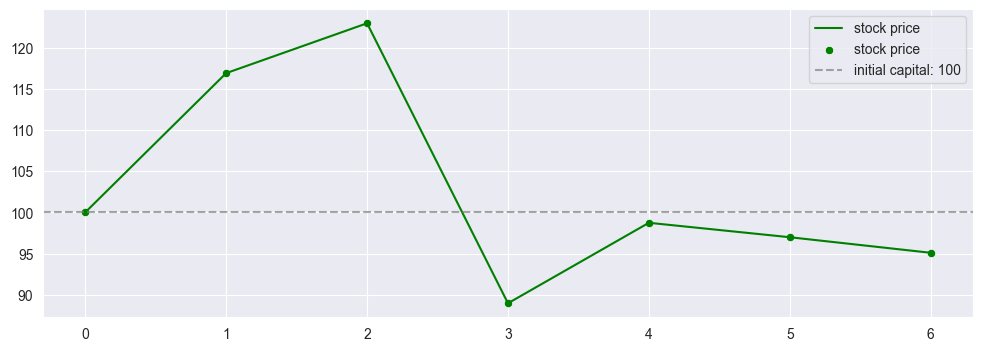

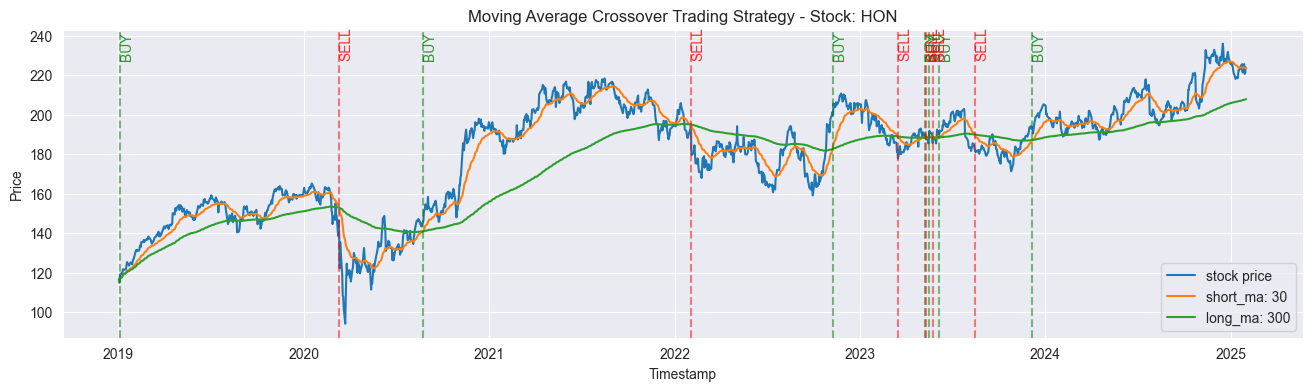

[{'type': 'BUY', 'date': Timestamp('2019-01-04 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-03-11 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-08-24 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-02-03 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-11-09 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-03-17 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-05-09 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-05-12 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-05-18 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-05-25 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-06-05 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-08-16 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-12-07 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = AAPL


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: 12.93%
Actual capital: $112.93


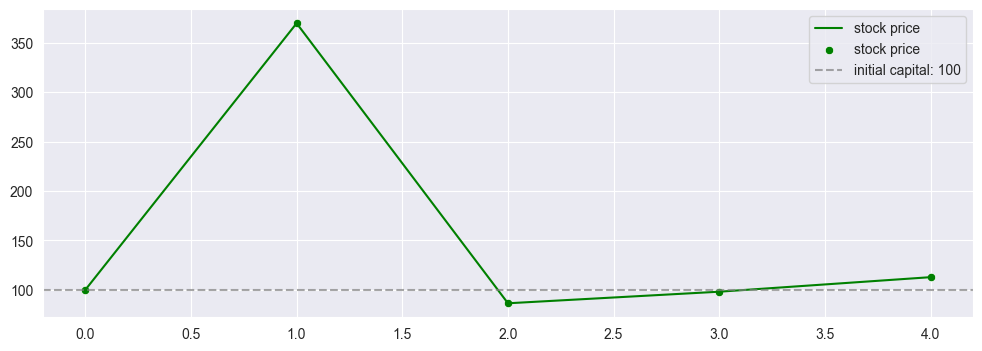

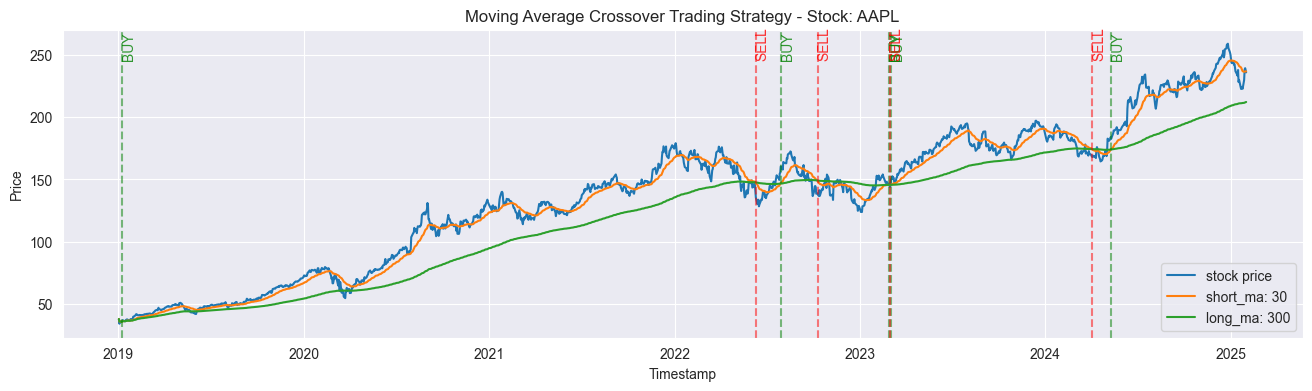

[{'type': 'BUY', 'date': Timestamp('2019-01-09 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-06-10 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-07-29 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-10-10 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-02-27 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-03-01 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-03-03 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2024-04-03 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-05-10 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = NVDA


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: 341.51%
Actual capital: $441.51


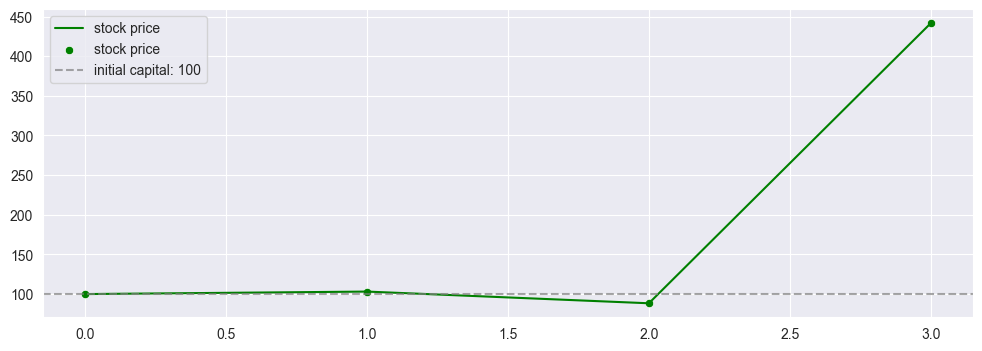

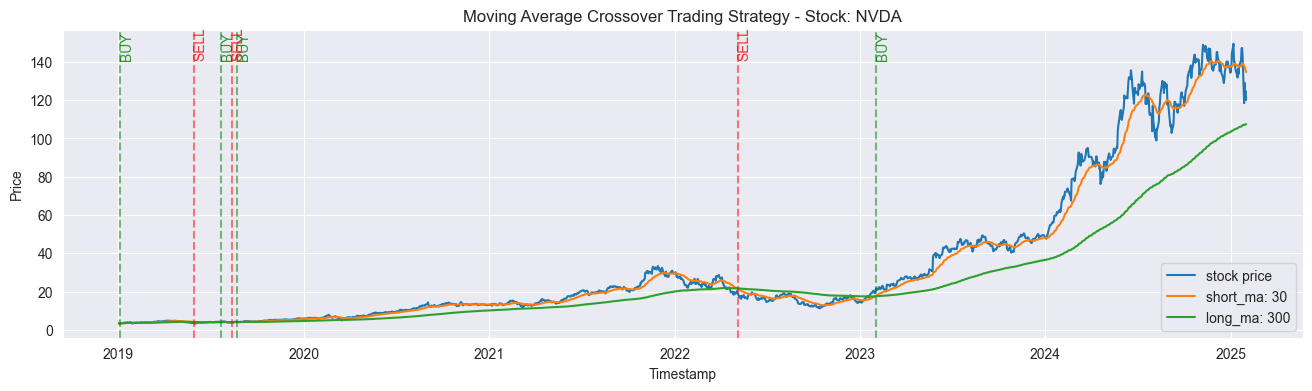

[{'type': 'BUY', 'date': Timestamp('2019-01-04 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-05-29 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-07-22 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-08-12 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-08-22 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-05-05 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-02-01 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = TSLA


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: -13.29%
Actual capital: $86.71


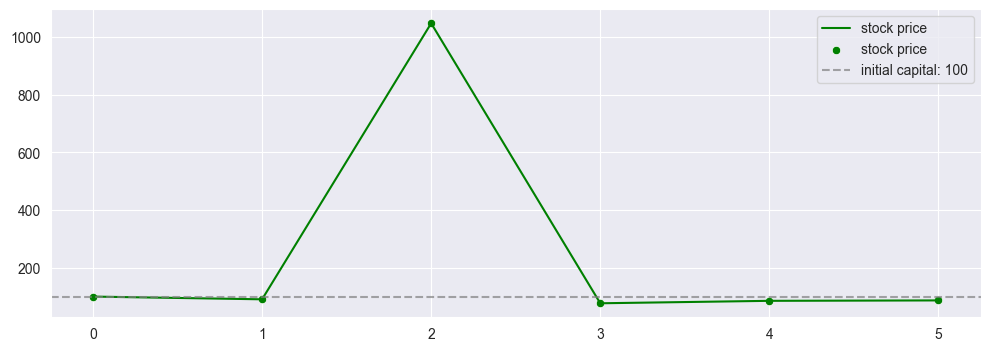

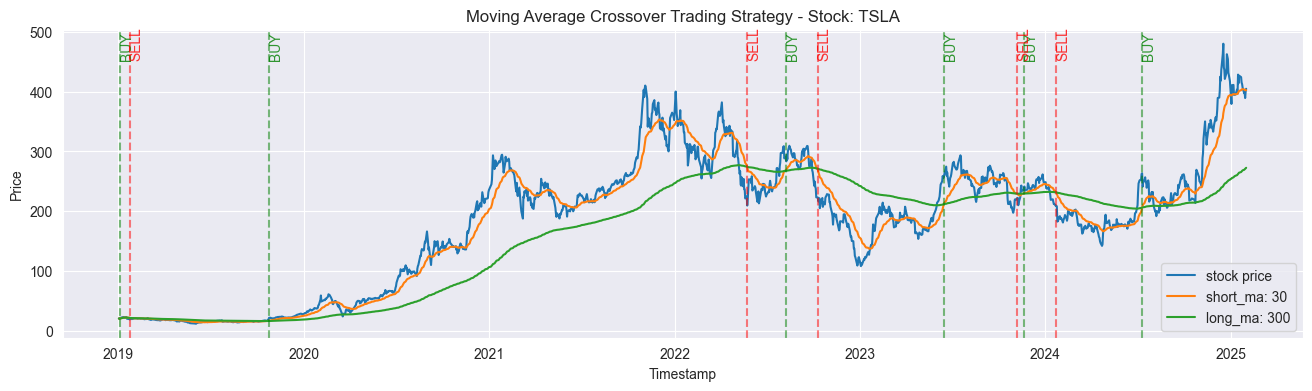

[{'type': 'BUY', 'date': Timestamp('2019-01-04 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-01-23 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-10-24 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-05-24 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2022-08-08 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-10-10 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-06-16 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-11-07 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-11-21 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2024-01-23 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2024-07-10 00:00:00')}]
********************************************************************************************************************************************************************************************************


Stock = BTC-USD


[*********************100%***********************]  1 of 1 completed


Profit of the trading strategy: -7.64%
Actual capital: $92.36


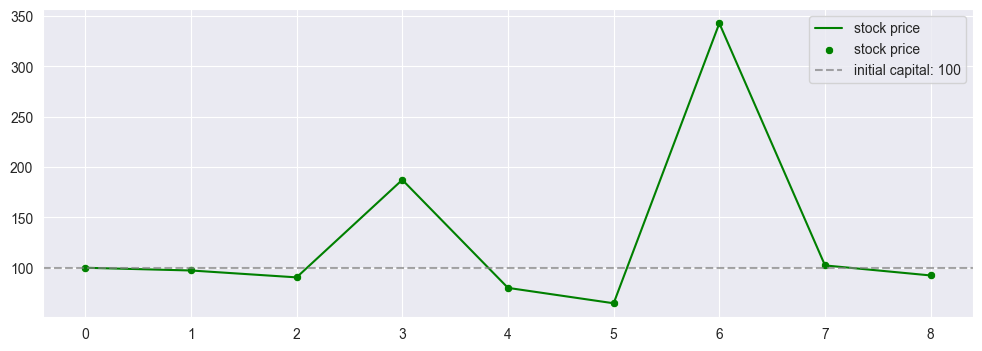

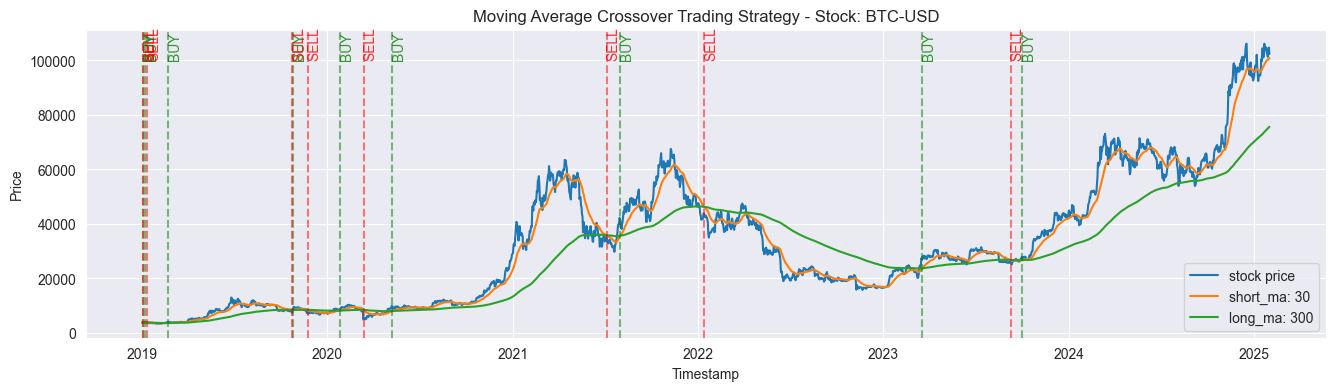

[{'type': 'BUY', 'date': Timestamp('2019-01-02 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-01-03 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-01-06 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-01-11 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-02-20 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-10-24 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2019-10-26 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2019-11-23 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-01-26 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2020-03-13 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2020-05-08 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2021-07-05 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2021-07-31 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2022-01-13 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-03-19 00:00:00')}, {'type': 'SELL', 'date': Timestamp('2023-09-09 00:00:00')}, {'type': 'BUY', 'date': Timestamp('2023-10-02 0

In [98]:
if __name__ == '__main__':

    import datetime

    stock_list:list = ['HON', 'AAPL', 'NVDA', 'TSLA', 'BTC-USD']
    short_period:int = 30 # days
    long_period:int = 300 # days 

    for stock in stock_list:
        print(f'Stock = {stock}')
        
        start_date = datetime.datetime(2019, 1, 1)
        end_date = datetime.datetime(2025, 2, 1)
        strategy = MovingAverageCrossover(100, stock, start_date, end_date, 30,300)

        strategy.download_data()
        strategy.construct_signals()
        strategy.simulate()
        strategy.plot_equity()
        strategy.plot_signals(plot_trading_dates=True)


        print(strategy.trading_dates)
        print('*'*200)
        print("\n")
